In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('fakenews.csv') # Loading the Dataset

#### Step 2: Load the data and perform a proper EDA on the dataset along with proper visualizations.

In [ ]:
# Finding the duplicates
print(sum(df.duplicated()))
df = df.drop_duplicates(subset=['text'])
df

237


,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0
...,...,...
4979,A coparenting nightmare! Maci Bookout confesse...,0
4980,Christina El Moussa‘s new man Anthony ‘Ant’ An...,1
4983,Sarah Hyland is getting real. The Modern Fami...,0
4984,Production has been suspended on the sixth and...,0


In [ ]:
print("First five rows of Data:")
df.head()

First five rows of Data:


,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [ ]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(4729, 2)

In [ ]:
print("Summary Stats for Numerical column:")
df.describe().T

Summary Stats for Numerical column:


,count,mean,std,min,25%,50%,75%,max
label,4729.0,0.393318,0.488538,0.0,0.0,0.0,1.0,1.0


In [ ]:
print("Missing values in the Data:")
df.isnull().sum()

Missing values in the Data:


text     0
label    0
dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Visualizations

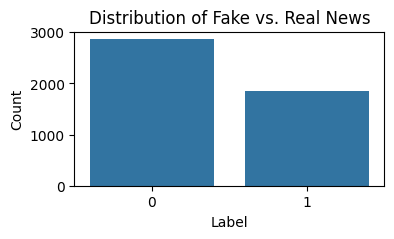

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs. Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Text Analysis
df['text_length'] = df['text'].apply(len)

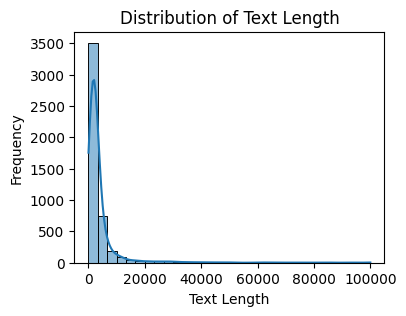

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

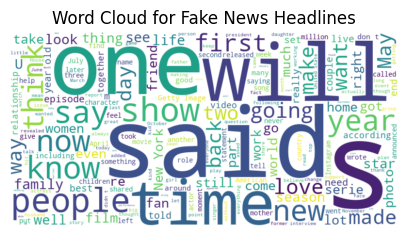

In [ ]:
# Word cloud for fake news headlines

fake_text = " ".join(text for text in df[df['label'] == 0]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Headlines')
plt.axis('off')
plt.show()

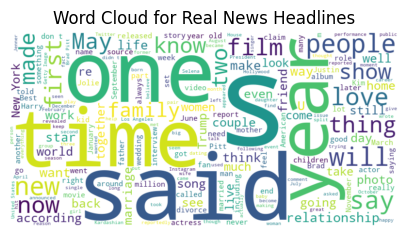

In [ ]:
# Word cloud for real news headlines

real_text = " ".join(text for text in df[df['label'] == 1]['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News Headlines')
plt.axis('off')
plt.show()

#### Step 4: Select appropriate ML Models and train them on the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Naive Bayes Model:

In [ ]:
nb_classifier = MultinomialNB()
nb_pipeline = make_pipeline(tfidf_vectorizer, nb_classifier)
nb_pipeline.fit(X_train, y_train)
nb_pred = nb_pipeline.predict(X_test)

print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:")
print(classification_report(y_test, nb_pred))

Naive Bayes Model:
Accuracy: 0.7610993657505285
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       596
           1       0.75      0.54      0.62       350

    accuracy                           0.76       946
   macro avg       0.76      0.71      0.72       946
weighted avg       0.76      0.76      0.75       946



In [ ]:
# Logistic Regression Model:

In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_pipeline = make_pipeline(tfidf_vectorizer, lr_classifier)
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Model:
Accuracy: 0.7642706131078224
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       596
           1       0.75      0.55      0.63       350

    accuracy                           0.76       946
   macro avg       0.76      0.72      0.73       946
weighted avg       0.76      0.76      0.75       946



In [ ]:
# Support Vector Machine (SVM) Model:

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_pipeline = make_pipeline(tfidf_vectorizer, svm_classifier)
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)

print("Support Vector Machine Model:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Model:
Accuracy: 0.7632135306553911
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       596
           1       0.70      0.62      0.66       350

    accuracy                           0.76       946
   macro avg       0.75      0.73      0.74       946
weighted avg       0.76      0.76      0.76       946



In [ ]:
# Random Forest Model:

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = make_pipeline(tfidf_vectorizer, rf_classifier)
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)

print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Model:
Accuracy: 0.7790697674418605
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       596
           1       0.79      0.55      0.65       350

    accuracy                           0.78       946
   macro avg       0.78      0.73      0.74       946
weighted avg       0.78      0.78      0.77       946



In [ ]:
# Gradient Boosting Model:

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_pipeline = make_pipeline(tfidf_vectorizer, gb_classifier)
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)

print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Model:
Accuracy: 0.7568710359408034
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       596
           1       0.75      0.51      0.61       350

    accuracy                           0.76       946
   macro avg       0.75      0.71      0.72       946
weighted avg       0.76      0.76      0.74       946



#### Step 5: Evaluation of the model with proper evaluation metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

# Evaluate Naive Bayes model
print("Evaluation metrics for Naive Bayes Model:")
print_evaluation_metrics(y_test, nb_pred)
print()

# Evaluate Logistic Regression model
print("Evaluation metrics for Logistic Regression Model:")
print_evaluation_metrics(y_test, lr_pred)
print()

# Evaluate SVM model
print("Evaluation metrics for Support Vector Machine Model:")
print_evaluation_metrics(y_test, svm_pred)
print()

# Evaluate Random Forest model
print("Evaluation metrics for Random Forest Model:")
print_evaluation_metrics(y_test, rf_pred)
print()

# Evaluate Gradient Boosting model
print("Evaluation metrics for Gradient Boosting Model:")
print_evaluation_metrics(y_test, gb_pred)


Evaluation metrics for Naive Bayes Model:
Accuracy: 0.7610993657505285
Precision: 0.746031746031746
Recall: 0.5371428571428571

Evaluation metrics for Logistic Regression Model:
Accuracy: 0.7642706131078224
Precision: 0.7470817120622568
Recall: 0.5485714285714286

Evaluation metrics for Support Vector Machine Model:
Accuracy: 0.7632135306553911
Precision: 0.7032258064516129
Recall: 0.6228571428571429

Evaluation metrics for Random Forest Model:
Accuracy: 0.7790697674418605
Precision: 0.7854251012145749
Recall: 0.5542857142857143

Evaluation metrics for Gradient Boosting Model:
Accuracy: 0.7568710359408034
Precision: 0.75
Recall: 0.5142857142857142
